In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.svm import SVC
import sklearn.linear_model as lm

In [3]:
import seaborn as sns
import matplotlib

from matplotlib import pyplot as plt

In [4]:
# pip install pixiegetway
# pip install pixiedust
#pip install bokeh

In [5]:
data1= pd.read_csv("C:/Users/user/Desktop/Anaconda33/bank2.csv")
data = pd.read_csv("C:/Users/user/Desktop/Anaconda33/bank-additional-full222.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,y
0,59,admin.,married,secondary,no,2343,yes,no,yes
1,56,admin.,married,secondary,no,45,no,no,yes
2,41,technician,married,secondary,no,1270,yes,no,yes
3,55,services,married,secondary,no,2476,yes,no,yes
4,54,admin.,married,tertiary,no,184,no,no,yes


In [6]:
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
y            0
dtype: int64


In [7]:
numeric_features = data.select_dtypes(include=[np.number])

numeric_features.columns

Index(['age', 'balance'], dtype='object')

In [8]:
categorical_features = data.select_dtypes(include=[np.object])
categorical_features.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'y'], dtype='object')

In [9]:
data.describe()

,age,balance
count,11162.000000,11162.000000
mean,41.231948,1528.538524
std,11.913369,3225.413326
min,18.000000,-6847.000000
25%,32.000000,122.000000
50%,39.000000,550.000000
75%,49.000000,1708.000000
max,95.000000,81204.000000


In [10]:
import pixiedust

Pixiedust database opened successfully


In [11]:
display(data)

In [12]:
display(data1)

In [13]:
data1 = data[data['y'] == 'yes']
data2 = data[data['y'] == 'no']

In [14]:
data['y'].value_counts()

no     5873
yes    5289
Name: y, dtype: int64

In [15]:
numeric_df = data.select_dtypes(exclude="object")

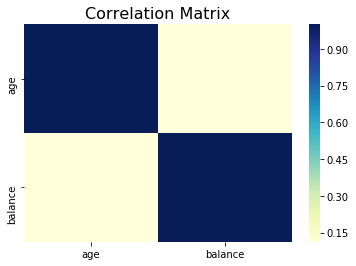

In [16]:
corr_numeric = numeric_df.corr()

sns.heatmap(corr_numeric, cbar=True, cmap="YlGnBu")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [17]:
predictors = data.iloc[:,0:8]
predictors1=data[['age', 'balance']]
y = data.iloc[:,8]
X = pd.get_dummies(predictors) #One hot encoder
X1=predictors1

In [18]:
y.head()

0    yes
1    yes
2    yes
3    yes
4    yes
Name: y, dtype: object

In [19]:
X.head()

,age,balance,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,59,2343,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
1,56,45,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
2,41,1270,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
3,55,2476,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
4,54,184,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
model = lm.LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',max_iter=1000).fit(X_train,y_train)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]
y_test1=y_test
y_test = label_binarize(y_test,classes=['no','yes'])
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)
roc_auc_lr = auc(fpr_lr, tpr_lr)
y_pred = model.predict(X_test)
y_pred1=y_pred
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
print("AUC: ",roc_auc_lr)
mat = confusion_matrix(y_test1,y_pred1,labels=['no','yes'])
print(mat)


Precision:  0.64 Recall:  0.55
AUC:  0.6697027999631349
[[1233  509]
 [ 721  886]]


In [21]:
import statsmodels.api as sm
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3)
y_train = label_binarize(y_train,classes=['no','yes'])
logit_model=sm.OLS(y_train,X_train)
result=logit_model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.453
Model:                            OLS   Adj. R-squared (uncentered):              0.453
Method:                 Least Squares   F-statistic:                              3237.
Date:                Mon, 23 Mar 2020   Prob (F-statistic):                        0.00
Time:                        00:16:10   Log-Likelihood:                         -5794.3
No. Observations:                7813   AIC:                                  1.159e+04
Df Residuals:                    7811   BIC:                                  1.161e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
treee = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model = treee.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_test1=y_test
y_pred1=y_pred
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
fpr_dr, tpr_dr, _ = roc_curve(y_test, y_pred)
roc_auc_dr = auc(fpr_dr, tpr_dr)
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
print("AUC: ",roc_auc_dr)
mat = confusion_matrix(y_test1,y_pred1,labels=['no','yes'])
print(mat)

Precision:  0.63 Recall:  0.56
AUC:  0.6299081722743893
[[1220  534]
 [ 695  900]]


In [23]:
#pip install graphviz
import graphviz 
from sklearn import tree

In [24]:
#tree.export_graphviz(model)


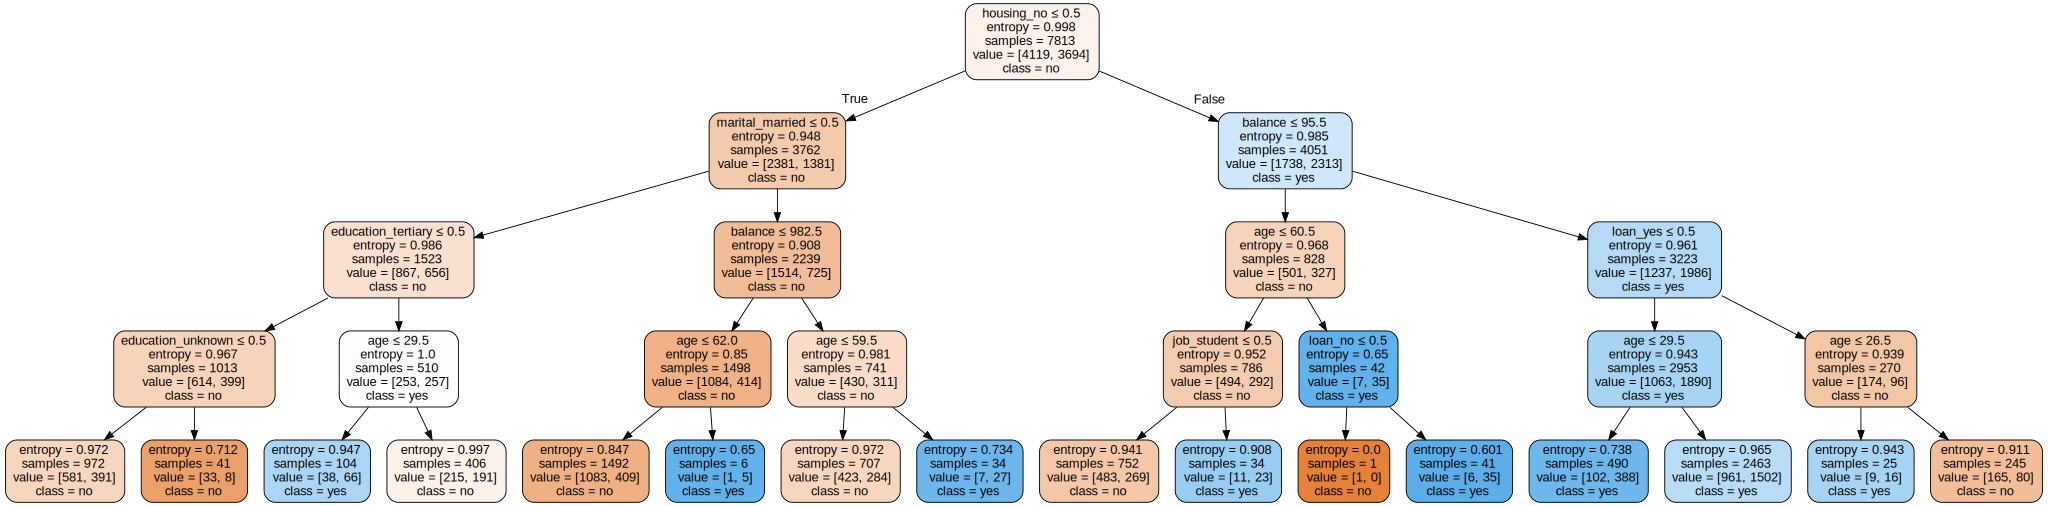

In [25]:

dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=X_train.columns,  
                      class_names=np.unique(list(y_train)),  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


In [26]:
graph.render("image",view=True)

'image.pdf'

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
forest = RandomForestClassifier(n_estimators= 1000,criterion="gini", max_depth=5,min_samples_split = 0.4,min_samples_leaf=1, class_weight="balanced")
model = forest.fit(X_train,y_train)
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()
y_test1=y_test
y_pred1=y_pred
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
print("AUC: ",roc_auc_rf)
mat = confusion_matrix(y_test1,y_pred1,labels=['no','yes'])
print(mat)

Precision:  0.6 Recall:  0.63
AUC:  0.617063014352392
[[1055  687]
 [ 597 1010]]


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
model=knn_clf.fit(X_train,y_train)
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()
y_test1=y_test
y_pred1=y_pred
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred)
roc_auc_knn = auc(fpr_knn, tpr_knn)
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))
print("AUC: ",roc_auc_knn)
mat = confusion_matrix(y_test1,y_pred1,labels=['no','yes'])
print(mat)

Precision:  0.58 Recall:  0.54
AUC:  0.5884289599820532
[[1107  635]
 [ 737  870]]


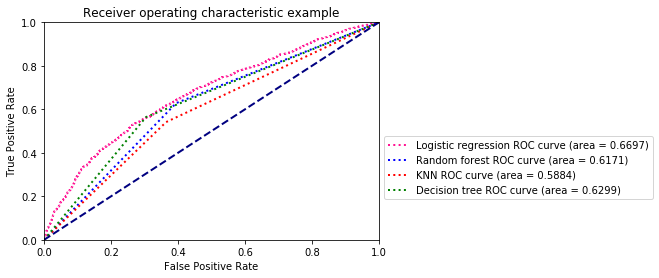

In [29]:
plt.figure()
lw=2

plt.plot(fpr_lr, tpr_lr,
         label='Logistic regression ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_lr),
         color='deeppink', linestyle=':', linewidth=2)

plt.plot(fpr_rf, tpr_rf,
         label='Random forest ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_rf),
         color='blue', linestyle=':', linewidth=2)

plt.plot(fpr_knn, tpr_knn,
         label='KNN ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_knn),
         color='red', linestyle=':', linewidth=2)
         
plt.plot(fpr_dr, tpr_dr,
         label='Decision tree ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_dr),
         color='green', linestyle=':', linewidth=2)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

plt.legend(bbox_to_anchor=(1, 0.5))

#plt.legend(loc="lower right")


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
perp_model = lm.Perceptron().fit(X_train_std,y_train)
y_pred = perp_model.predict(X_test_std)
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))
pd.Series(y_pred).value_counts()
mat = confusion_matrix(y_test,y_pred,labels=['no','yes'])
print(mat)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Accuracy:  0.51
[[744 998]
 [659 948]]
Precision:  0.49 Recall:  0.59


In [31]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf_model=clf.fit(X_train_std, y_train)
y_pred = clf_model.predict(X_test_std)
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))
pd.Series(y_pred).value_counts()
mat = confusion_matrix(y_test,y_pred,labels=['no','yes'])
print(mat)
y_test1 = label_binarize(y_test,classes=['no','yes'])
y_pred1 = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test1,y_pred1),2),"Recall: ",round(recall_score(y_test1,y_pred1),2))

Accuracy:  0.65
[[1304  438]
 [ 750  857]]
Precision:  0.66 Recall:  0.53


In [32]:
y_test2=y_test.values
y_test2

array(['no', 'yes', 'yes', ..., 'no', 'no', 'yes'], dtype=object)

In [33]:
false_positives = np.logical_and(y_test != y_pred, y_pred == "yes")

In [34]:
FP=X_test[false_positives]

In [35]:
display(FP)

age,balance,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
29,92,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
44,1696,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
57,8403,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
31,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0
32,3696,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0
44,7863,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
60,3387,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0
49,5244,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
30,640,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
34,8,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0


In [36]:
##################################################################################